# Titanic: Machine Learning from Disaster


## 1. Defining the problem statement
Complete the analysis of what sorts of people were likely to survive.  
In particular, we ask you to apply the tools of machine learning to predict which passengers survived the Titanic tragedy.

In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## 2. Exploratory data analysis
Printing first 5 rows of the train dataset.

In [2]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary
- Survived: 	0 = No, 1 = Yes  
- pclass: 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  	
- sibsp:	# of siblings / spouses aboard the Titanic  	
- parch:	# of parents / children aboard the Titanic  	
- ticket:	Ticket number	
- cabin:	Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  

In [3]:
train.shape

(891, 12)

**Total rows and columns**

We can see that there are 891 rows and 12 columns in our training dataset.

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We can see that *Age* value is missing for many rows. 

Out of 891 rows, the *Age* value is present only in 714 rows.

Similarly, *Cabin* values are also missing in many rows. Only 204 out of 891 rows have *Cabin* values.

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are 177 rows with missing *Age*, 687 rows with missing *Cabin* and 2 rows with missing *Embarked* information.

### import python lib for visualization

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

### Bar Chart for Categorical Features
- Pclass
- Sex
- SibSp ( # of siblings and spouse)
- Parch ( # of parents and children)
- Embarked
- Cabin

In [12]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

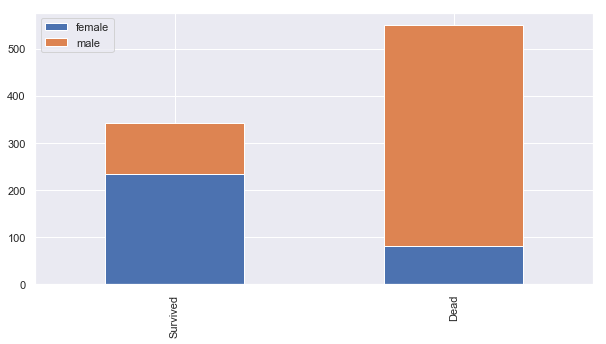

In [13]:
bar_chart('Sex')

The Chart confirms **Women** more likely survivied than **Men**

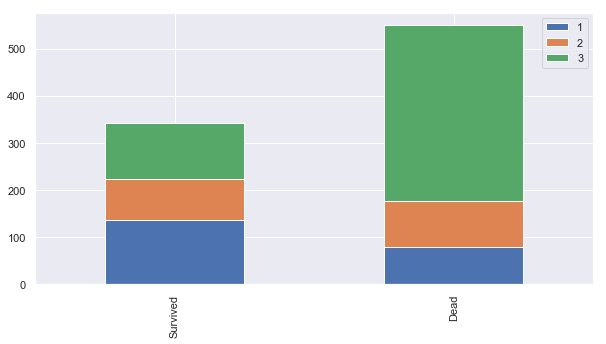

In [14]:
bar_chart('Pclass')

The Chart confirms **1st class** more likely survivied than **other classes**  
The Chart confirms **3rd class** more likely dead than **other classes**

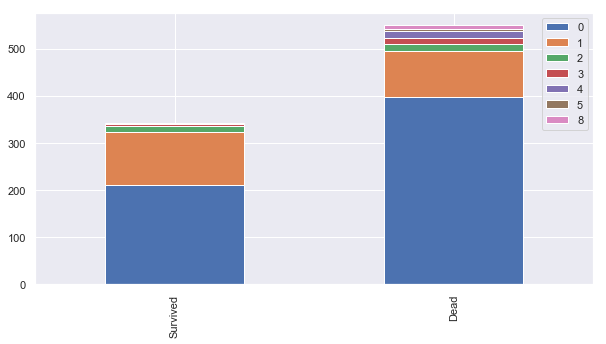

In [15]:
bar_chart('SibSp')

The Chart confirms **a person aboarded with more than 2 siblings or spouse** more likely survived  
The Chart confirms ** a person aboarded without siblings or spouse** more likely dead

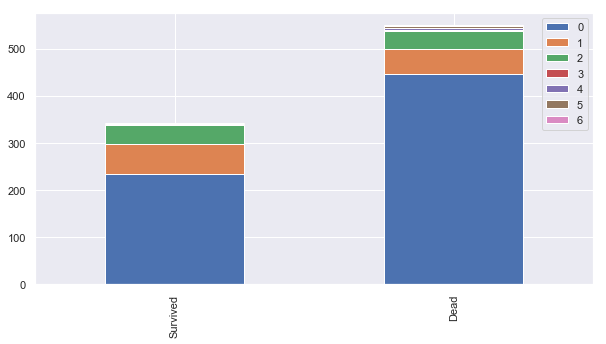

In [16]:
bar_chart('Parch')

The Chart confirms **a person aboarded with more than 2 parents or children** more likely survived  
The Chart confirms ** a person aboarded alone** more likely dead

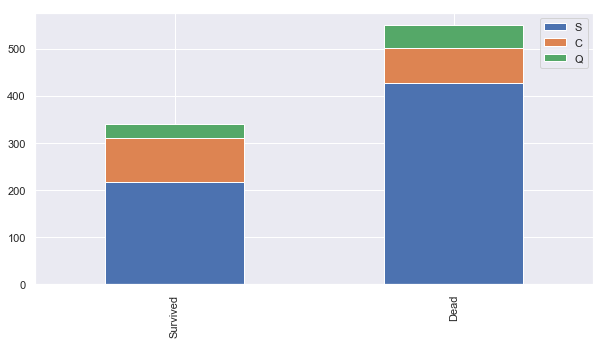

In [17]:
bar_chart('Embarked')

The Chart confirms **a person aboarded from C** slightly more likely survived  
The Chart confirms **a person aboarded from Q** more likely dead  
The Chart confirms **a person aboarded from S** more likely dead

## 3. Feature engineering

Feature engineering is the process of using domain knowledge of the data  
to create features (**feature vectors**) that make machine learning algorithms work.  

feature vector is an n-dimensional vector of numerical features that represent some object.  
Many algorithms in machine learning require a numerical representation of objects,  
since such representations facilitate processing and statistical analysis.

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 4. Feature Engineering
### 4.1 Name

In [19]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [20]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Capt          1
Jonkheer      1
Sir           1
Don           1
Ms            1
Mme           1
Lady          1
Countess      1
Name: Title, dtype: int64

In [21]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

#### Title map
Mr : 0  
Miss : 1  
Mrs: 2  
Others: 3


In [22]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [24]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


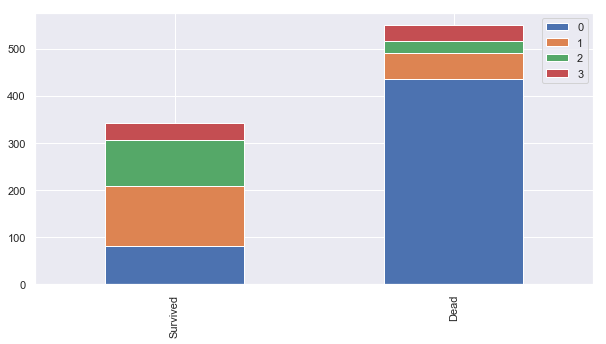

In [25]:
bar_chart('Title')

In [26]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [28]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


### 4.2 Sex

male: 0
female: 1

In [29]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

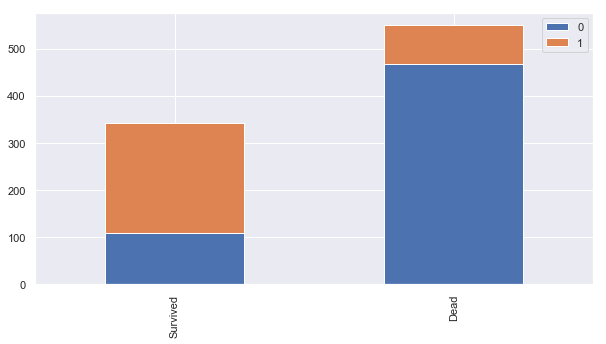

In [30]:
bar_chart('Sex')

## 4.3 Filling Missing Values
### 4.3.1 Embarked

In [31]:
for dataset in train_test_data:
    dataset.Embarked[ dataset.Embarked.isnull() ] = dataset.Embarked.dropna().mode().values

C:\Users\AKSHAY\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### 4.3.2 Fare

In [32]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


### 4.3.3 Cabin

In [33]:
for dataset in train_test_data:
    print(dataset.Cabin.value_counts())

G6                 4
C23 C25 C27        4
B96 B98            4
F33                3
F2                 3
E101               3
C22 C26            3
D                  3
C93                2
E8                 2
C68                2
D17                2
D35                2
B28                2
B5                 2
B20                2
E44                2
C125               2
D36                2
B57 B59 B63 B66    2
B22                2
E67                2
C65                2
E24                2
B51 B53 B55        2
E121               2
C78                2
C83                2
B49                2
E33                2
                  ..
E36                1
D19                1
A36                1
C106               1
D11                1
E12                1
A24                1
B4                 1
A32                1
F38                1
C90                1
C46                1
C70                1
D48                1
D7                 1
C49                1
A6           

In [34]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

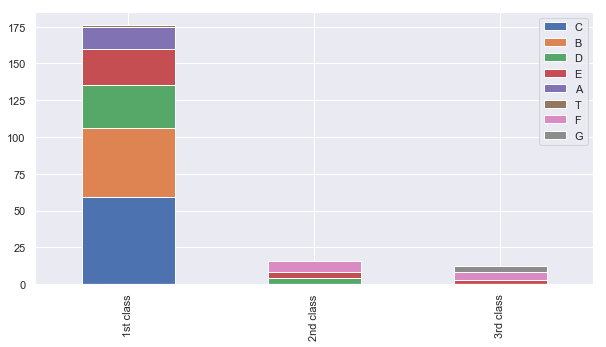

In [35]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [36]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [37]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [38]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,2.0,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,0.8,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,0.8,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,2.0,S,0


## Drop Ticket Column

In [39]:
for dataset in train_test_data:
    dataset.drop(['Ticket'], axis = 1, inplace = True)

In [40]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,2.0,S,0
1,2,1,1,1,38.0,1,0,71.2833,0.8,C,2
2,3,1,3,1,26.0,0,0,7.9250,2.0,S,1
3,4,1,1,1,35.0,1,0,53.1000,0.8,S,2
4,5,0,3,0,35.0,0,0,8.0500,2.0,S,0


In [41]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,2.0,Q,0
1,893,3,1,47.0,1,0,7.0000,2.0,S,2
2,894,2,0,62.0,0,0,9.6875,2.0,Q,0
3,895,3,0,27.0,0,0,8.6625,2.0,S,0
4,896,3,1,22.0,1,1,12.2875,2.0,S,2


### 4.3.4 Age

In [42]:
from sklearn.ensemble import RandomForestRegressor

### Populate missing ages using RandomForestClassifier
def setMissingAges(df):
    # Grab all the features that can be included in a Random Forest Regressor
    age_df = df[['Age', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Title']]
    # Split into sets with known and unknown Age values
    knownAge = age_df.loc[ (df.Age.notnull()) ]
    unknownAge = age_df.loc[ (df.Age.isnull()) ]

    # All age values are stored in a target array
    y = knownAge.values[:, 0]

    # All the other values are stored in the feature array
    X = knownAge.values[:, 1::]

    # Create and fit a model
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(X, y)

    # Use the fitted model to predict the missing values
    predictedAges = rtr.predict(unknownAge.values[:, 1::])

    # Assign those predictions to the full data set
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges

    return df

C:\Users\AKSHAY\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [43]:
for dataset in train_test_data:
    setMissingAges(dataset)

In [44]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [45]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

## 5. Derived Variable
### 5.1 FamilySize

In [46]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [47]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

## 6.Scaling Age and Fare

In [48]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

#### feature vector map:  
child: 0  
young: 1  
adult: 2  
mid-age: 3  
senior: 4

In [49]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [50]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0,0,0.0,2.0,Q,0,0.0
1,893,3,1,3.0,1,0,0.0,2.0,S,2,0.4
2,894,2,0,3.0,0,0,0.0,2.0,Q,0,0.0
3,895,3,0,2.0,0,0,0.0,2.0,S,0,0.0
4,896,3,1,1.0,1,1,0.0,2.0,S,2,0.8


## 7. Category Embarked and Pclass Title Dummy Variables
### 7.1 Pclass

In [51]:
dummy_df = pd.get_dummies(train.Pclass, drop_first = True)
dummy_df = dummy_df.rename(columns=lambda x: 'Pclass_' + str(x))
train = pd.concat([train, dummy_df], axis=1)

In [52]:
dummy_df = pd.get_dummies(test.Pclass, drop_first = True)
dummy_df = dummy_df.rename(columns=lambda x: 'Pclass_' + str(x))
test = pd.concat([test, dummy_df], axis=1)

### 7.2 Embarked

In [53]:
dummy_df = pd.get_dummies(train.Embarked, drop_first = True)
dummy_df = dummy_df.rename(columns=lambda x: 'Embarked_' + str(x))
train = pd.concat([train, dummy_df], axis=1)

In [54]:
dummy_df = pd.get_dummies(test.Embarked, drop_first = True)
dummy_df = dummy_df.rename(columns=lambda x: 'Embarked_' + str(x))
test = pd.concat([test, dummy_df], axis=1)

### 7.3 Title

In [55]:
dummy_df = pd.get_dummies(train.Title, drop_first = True)
dummy_df = dummy_df.rename(columns=lambda x: 'Title_' + str(x))
train = pd.concat([train, dummy_df], axis=1)

In [56]:
dummy_df = pd.get_dummies(test.Title, drop_first = True)
dummy_df = dummy_df.rename(columns=lambda x: 'Title_' + str(x))
test = pd.concat([test, dummy_df], axis=1)

In [57]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_1,Title_2,Title_3
0,1,0,3,0,1.0,1,0,0.0,2.0,S,0,0.4,0,1,0,1,0,0,0
1,2,1,1,1,3.0,1,0,2.0,0.8,C,2,0.4,0,0,0,0,0,1,0
2,3,1,3,1,1.0,0,0,0.0,2.0,S,1,0.0,0,1,0,1,1,0,0
3,4,1,1,1,2.0,1,0,2.0,0.8,S,2,0.4,0,0,0,1,0,1,0
4,5,0,3,0,2.0,0,0,0.0,2.0,S,0,0.0,0,1,0,1,0,0,0


In [58]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_1,Title_2,Title_3
0,892,3,0,2.0,0,0,0.0,2.0,Q,0,0.0,0,1,1,0,0,0,0
1,893,3,1,3.0,1,0,0.0,2.0,S,2,0.4,0,1,0,1,0,1,0
2,894,2,0,3.0,0,0,0.0,2.0,Q,0,0.0,1,0,1,0,0,0,0
3,895,3,0,2.0,0,0,0.0,2.0,S,0,0.0,0,1,0,1,0,0,0
4,896,3,1,1.0,1,1,0.0,2.0,S,2,0.8,0,1,0,1,0,1,0


### Removing Extra features

In [59]:
features_drop = ['SibSp', 'Parch', 'Pclass', 'Embarked', 'Title']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [60]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 12), (891,))

In [61]:
train_data.head(10)

,Sex,Age,Fare,Cabin,FamilySize,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_1,Title_2,Title_3
0,0,1.0,0.0,2.0,0.4,0,1,0,1,0,0,0
1,1,3.0,2.0,0.8,0.4,0,0,0,0,0,1,0
2,1,1.0,0.0,2.0,0.0,0,1,0,1,1,0,0
3,1,2.0,2.0,0.8,0.4,0,0,0,1,0,1,0
4,0,2.0,0.0,2.0,0.0,0,1,0,1,0,0,0
5,0,1.0,0.0,2.0,0.0,0,1,1,0,0,0,0
6,0,3.0,2.0,1.6,0.0,0,0,0,1,0,0,0
7,0,0.0,1.0,2.0,1.6,0,1,0,1,0,0,1
8,1,2.0,0.0,2.0,0.8,0,1,0,1,0,1,0
9,1,0.0,2.0,1.8,0.4,1,0,0,0,0,1,0


# Modelling

In [62]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

### Cross Validation (K-fold)

In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### KNN

In [64]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.80898876 0.82022472 0.80898876 0.84269663 0.80898876
 0.83146067 0.84269663 0.7752809  0.82022472]


In [65]:
# kNN Score
round(np.mean(score)*100, 2)

81.93

### Decision Tree

In [66]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.82022472 0.78651685 0.79775281 0.87640449 0.7752809
 0.83146067 0.83146067 0.75280899 0.79775281]


In [67]:
# decision tree Score
round(np.mean(score)*100, 2)

80.36

### Ramdom Forest

In [68]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.78651685 0.82022472 0.78651685 0.87640449 0.78651685
 0.82022472 0.82022472 0.76404494 0.80898876]


In [69]:
# Random Forest Score
round(np.mean(score)*100, 2)

80.81

### Naive Bayes

In [70]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.75280899 0.76404494 0.74157303 0.69662921 0.79775281
 0.78651685 0.82022472 0.82022472 0.82022472]


In [71]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

78.0

### SVM

In [72]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.80898876 0.80898876 0.80898876 0.85393258 0.80898876
 0.80898876 0.85393258 0.83146067 0.86516854]


In [73]:
round(np.mean(score)*100,2)

83.05

# NN with 3 Layers

In [81]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [82]:
#compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'mean_absolute_error'])

In [83]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 39        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 4         
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


In [84]:

#fit the model
model.fit(train_data, target, epochs=500, batch_size=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/500
891/891 [==============================] - 1s 1ms/step - loss: 0.7363 - acc: 0.5264 - mean_absolute_error: 0.4891
Epoch 2/500
891/891 [==============================] - 0s 36us/step - loss: 0.6861 - acc: 0.6364 - mean_absolute_error: 0.4781
Epoch 3/500
891/891 [==============================] - 0s 22us/step - loss: 0.6506 - acc: 0.7351 - mean_absolute_error: 0.4661
Epoch 4/500
891/891 [==============================] - 0s 32us/step - loss: 0.6245 - acc: 0.7486 - mean_absolute_error: 0.4541
Epoch 5/500
891/891 [==============================] - 0s 34us/step - loss: 0.6014 - acc: 0.7464 - mean_absolute_error: 0.4413
Epoch 6/500
891/891 [==============================] - 0s 27us/step - loss: 0.5789 - acc: 0.7497 - mean_absolute_error: 0.4278
Epoch 7/500
891/891 [==============================] - 0s 20us/step - loss: 0.5601 - acc: 0.7632 - mean_absolute_error: 0.4150
Epoch 8/500
891/891 [==============================] - 0s 18us/s

891/891 [==============================] - 0s 28us/step - loss: 0.3879 - acc: 0.8429 - mean_absolute_error: 0.2455
Epoch 64/500
891/891 [==============================] - 0s 22us/step - loss: 0.3878 - acc: 0.8373 - mean_absolute_error: 0.2455
Epoch 65/500
891/891 [==============================] - 0s 21us/step - loss: 0.3868 - acc: 0.8440 - mean_absolute_error: 0.2452
Epoch 66/500
891/891 [==============================] - 0s 19us/step - loss: 0.3866 - acc: 0.8418 - mean_absolute_error: 0.2458
Epoch 67/500
891/891 [==============================] - 0s 24us/step - loss: 0.3860 - acc: 0.8384 - mean_absolute_error: 0.2446
Epoch 68/500
891/891 [==============================] - 0s 20us/step - loss: 0.3853 - acc: 0.8474 - mean_absolute_error: 0.2441
Epoch 69/500
891/891 [==============================] - 0s 22us/step - loss: 0.3852 - acc: 0.8418 - mean_absolute_error: 0.2433
Epoch 70/500
891/891 [==============================] - 0s 19us/step - loss: 0.3856 - acc: 0.8384 - mean_absolute_err

891/891 [==============================] - 0s 17us/step - loss: 0.3712 - acc: 0.8451 - mean_absolute_error: 0.2320
Epoch 127/500
891/891 [==============================] - 0s 16us/step - loss: 0.3721 - acc: 0.8418 - mean_absolute_error: 0.2334
Epoch 128/500
891/891 [==============================] - 0s 20us/step - loss: 0.3705 - acc: 0.8418 - mean_absolute_error: 0.2327
Epoch 129/500
891/891 [==============================] - 0s 16us/step - loss: 0.3704 - acc: 0.8451 - mean_absolute_error: 0.2316
Epoch 130/500
891/891 [==============================] - 0s 18us/step - loss: 0.3703 - acc: 0.8451 - mean_absolute_error: 0.2311
Epoch 131/500
891/891 [==============================] - 0s 20us/step - loss: 0.3704 - acc: 0.8440 - mean_absolute_error: 0.2316
Epoch 132/500
891/891 [==============================] - 0s 18us/step - loss: 0.3704 - acc: 0.8440 - mean_absolute_error: 0.2326
Epoch 133/500
891/891 [==============================] - 0s 22us/step - loss: 0.3701 - acc: 0.8440 - mean_absol

891/891 [==============================] - 0s 17us/step - loss: 0.3641 - acc: 0.8474 - mean_absolute_error: 0.2282
Epoch 190/500
891/891 [==============================] - 0s 16us/step - loss: 0.3635 - acc: 0.8440 - mean_absolute_error: 0.2273
Epoch 191/500
891/891 [==============================] - 0s 21us/step - loss: 0.3630 - acc: 0.8496 - mean_absolute_error: 0.2281
Epoch 192/500
891/891 [==============================] - 0s 16us/step - loss: 0.3630 - acc: 0.8485 - mean_absolute_error: 0.2285
Epoch 193/500
891/891 [==============================] - 0s 17us/step - loss: 0.3631 - acc: 0.8496 - mean_absolute_error: 0.2266
Epoch 194/500
891/891 [==============================] - 0s 19us/step - loss: 0.3637 - acc: 0.8496 - mean_absolute_error: 0.2263
Epoch 195/500
891/891 [==============================] - 0s 20us/step - loss: 0.3628 - acc: 0.8519 - mean_absolute_error: 0.2273
Epoch 196/500
891/891 [==============================] - 0s 18us/step - loss: 0.3627 - acc: 0.8519 - mean_absol

891/891 [==============================] - 0s 22us/step - loss: 0.3570 - acc: 0.8541 - mean_absolute_error: 0.2242
Epoch 253/500
891/891 [==============================] - 0s 27us/step - loss: 0.3570 - acc: 0.8519 - mean_absolute_error: 0.2237
Epoch 254/500
891/891 [==============================] - 0s 22us/step - loss: 0.3567 - acc: 0.8530 - mean_absolute_error: 0.2239
Epoch 255/500
891/891 [==============================] - 0s 22us/step - loss: 0.3570 - acc: 0.8530 - mean_absolute_error: 0.2237
Epoch 256/500
891/891 [==============================] - 0s 27us/step - loss: 0.3571 - acc: 0.8530 - mean_absolute_error: 0.2235
Epoch 257/500
891/891 [==============================] - 0s 24us/step - loss: 0.3574 - acc: 0.8507 - mean_absolute_error: 0.2249
Epoch 258/500
891/891 [==============================] - 0s 27us/step - loss: 0.3562 - acc: 0.8530 - mean_absolute_error: 0.2237
Epoch 259/500
891/891 [==============================] - 0s 27us/step - loss: 0.3569 - acc: 0.8530 - mean_absol

891/891 [==============================] - 0s 20us/step - loss: 0.3524 - acc: 0.8530 - mean_absolute_error: 0.2206
Epoch 316/500
891/891 [==============================] - 0s 20us/step - loss: 0.3524 - acc: 0.8552 - mean_absolute_error: 0.2208
Epoch 317/500
891/891 [==============================] - 0s 26us/step - loss: 0.3515 - acc: 0.8552 - mean_absolute_error: 0.2196
Epoch 318/500
891/891 [==============================] - 0s 24us/step - loss: 0.3518 - acc: 0.8586 - mean_absolute_error: 0.2201
Epoch 319/500
891/891 [==============================] - 0s 28us/step - loss: 0.3518 - acc: 0.8563 - mean_absolute_error: 0.2211
Epoch 320/500
891/891 [==============================] - 0s 19us/step - loss: 0.3511 - acc: 0.8575 - mean_absolute_error: 0.2208
Epoch 321/500
891/891 [==============================] - 0s 19us/step - loss: 0.3521 - acc: 0.8575 - mean_absolute_error: 0.2201
Epoch 322/500
891/891 [==============================] - 0s 24us/step - loss: 0.3512 - acc: 0.8575 - mean_absol

891/891 [==============================] - 0s 24us/step - loss: 0.3461 - acc: 0.8608 - mean_absolute_error: 0.2180
Epoch 378/500
891/891 [==============================] - 0s 20us/step - loss: 0.3464 - acc: 0.8586 - mean_absolute_error: 0.2183
Epoch 379/500
891/891 [==============================] - 0s 22us/step - loss: 0.3464 - acc: 0.8552 - mean_absolute_error: 0.2174
Epoch 380/500
891/891 [==============================] - 0s 22us/step - loss: 0.3457 - acc: 0.8552 - mean_absolute_error: 0.2169
Epoch 381/500
891/891 [==============================] - 0s 23us/step - loss: 0.3467 - acc: 0.8563 - mean_absolute_error: 0.2186
Epoch 382/500
891/891 [==============================] - 0s 28us/step - loss: 0.3461 - acc: 0.8552 - mean_absolute_error: 0.2182
Epoch 383/500
891/891 [==============================] - 0s 26us/step - loss: 0.3460 - acc: 0.8575 - mean_absolute_error: 0.2175
Epoch 384/500
891/891 [==============================] - 0s 22us/step - loss: 0.3454 - acc: 0.8620 - mean_absol

891/891 [==============================] - 0s 25us/step - loss: 0.3409 - acc: 0.8653 - mean_absolute_error: 0.2134
Epoch 441/500
891/891 [==============================] - 0s 20us/step - loss: 0.3406 - acc: 0.8631 - mean_absolute_error: 0.2151
Epoch 442/500
891/891 [==============================] - 0s 26us/step - loss: 0.3413 - acc: 0.8631 - mean_absolute_error: 0.2156
Epoch 443/500
891/891 [==============================] - 0s 26us/step - loss: 0.3409 - acc: 0.8608 - mean_absolute_error: 0.2139
Epoch 444/500
891/891 [==============================] - 0s 22us/step - loss: 0.3401 - acc: 0.8631 - mean_absolute_error: 0.2144
Epoch 445/500
891/891 [==============================] - 0s 21us/step - loss: 0.3403 - acc: 0.8653 - mean_absolute_error: 0.2141
Epoch 446/500
891/891 [==============================] - 0s 24us/step - loss: 0.3401 - acc: 0.8653 - mean_absolute_error: 0.2138
Epoch 447/500
891/891 [==============================] - 0s 26us/step - loss: 0.3400 - acc: 0.8631 - mean_absol

In [86]:
scores = model.evaluate(train_data,target)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

891/891 [==============================] - 0s 201us/step

acc: 86.53%


# Scores

In [ ]:
from IPython.display import Image
Image(url= "Capture.JPG")